# Pandas Introduction

## Reading files into DataFrames

In Pandas, data is accessed through a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe). A DataFrame is a 2D data structure where each column may contain different data types, from numeric series to complex structures. In most cases, you can think on DataFrames as _tables_.

The [IO API](https://pandas.pydata.org/pandas-docs/stable/io.html) has different methods to read different formats, most common one is text-delimited files:

In [1]:
import pandas as pd
data = pd.read_csv("goog.csv")

From this point we can access the data using different methods. For instance, `head(n)` will retrieve the first `n` columns:

In [2]:
data.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,692.200012,700.650024,692.130005,699.210022,1342700,699.210022
1,2016-06-30,685.469971,692.320007,683.650024,692.099976,1590500,692.099976


DataFrame also allows _range_ expressions:

In [3]:
data[5:7]

,Date,Open,High,Low,Close,Volume,Adj Close
5,2016-06-24,675.169983,689.400024,673.450012,675.219971,4399800,675.219971
6,2016-06-23,697.450012,701.950012,687.000000,701.869995,2157400,701.869995


Single row access is done using `iloc` attribute:

In [4]:
data.iloc[5]

Date         2016-06-24
Open             675.17
High              689.4
Low              673.45
Close            675.22
Volume          4399800
Adj Close        675.22
Name: 5, dtype: object

In [5]:
data.iloc[5].Open

675.169983

All methods and attributes a DataFrame supports can be checked in the [API documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

### Data formats

Pandas can read and write multiple data formats, using `read_X` and `to_X` methods. Parameters are described in the [IO API documentation](https://pandas.pydata.org/pandas-docs/stable/io.html).

In [6]:
prices = pd.read_msgpack('./data/prices.mp')
prices.head()

Close     High      Low     Open     Volume
Symbol Date                                                     
aapl   2010-01-01  30.1046  30.4786  30.0800  30.4443          0
       2010-01-04  30.5729  30.6429  30.3400  30.5000  123432050
       2010-01-05  30.6257  30.7986  30.4643  30.6843  150476004
       2010-01-06  30.1386  30.7471  30.1071  30.6257  138039594
       2010-01-07  30.0829  30.2857  29.8643  30.2400  119282324

### Column Indexing

By default, `read_csv` will not assume any index in the data. In our case we have a _natural_ index in the first column, so we can read the file again to make sure it's incorporated in the DataFrame:

In [7]:
data = pd.read_csv("goog.csv", index_col=0)
data.head(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-01,692.200012,700.650024,692.130005,699.210022,1342700,699.210022
2016-06-30,685.469971,692.320007,683.650024,692.099976,1590500,692.099976


And then we can use range expressions to fetch _years_:

In [8]:
data["2016":"2015"].head(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,769.500000,769.500000,758.340027,758.880005,1489600,758.880005
2015-12-30,776.599976,777.599976,766.900024,771.000000,1293300,771.000000


Or _month_ ranges:

In [9]:
data["2015-12":"2015-11"].head(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-11-30,748.809998,754.929993,741.27002,742.599976,2097600,742.599976
2015-11-27,748.460022,753.409973,747.48999,750.260010,838500,750.260010


### Adding or removing columns

In [10]:
data["Diff"] = data.Close - data.Open
data[["Open", "Close", "Diff"]].head(2)

,Open,Close,Diff
Date,,,
2016-07-01,692.200012,699.210022,7.010010
2016-06-30,685.469971,692.099976,6.630005


In [11]:
del data["Diff"]
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

### Series

All columns in the previous DataFrame are defined as [_Series_](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). A Serie is a data bag indexed by date, in most cases.

In [12]:
data.Close[:2]

Date
2016-07-01    699.210022
2016-06-30    692.099976
Name: Close, dtype: float64

In [13]:
type(data)

pandas.core.frame.DataFrame

In [14]:
type(data.Close)

pandas.core.series.Series

[Series API](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series) has multiple methods, but one of the most interesting ones is the `describe` one:

In [15]:
data.Close.describe()

count    2989.000000
mean      545.555584
std       196.002935
min       100.010169
25%       435.110754
50%       537.359985
75%       625.651065
max      1220.172036
Name: Close, dtype: float64

#### Sampling

In [16]:
data.Close.sample(n=3)

Date
2015-04-28    553.679993
2006-05-02    394.800672
2011-04-08    578.160961
Name: Close, dtype: float64

#### Querying

In [17]:
data[data.Close > 1220]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-02-26,1224.002141,1228.882066,1213.762102,1220.172036,3979100,609.476541
2014-02-25,1215.942121,1224.502055,1210.422109,1220.002089,2888100,609.391653


#### Masking 

In [18]:
data.Close.where(lambda x: x > 685, -42).head(5)

Date
2016-07-01    699.210022
2016-06-30    692.099976
2016-06-29    -42.000000
2016-06-28    -42.000000
2016-06-27    -42.000000
Name: Close, dtype: float64

In [19]:
data.Close.mask(lambda x: x > 685, -42).head(5)

Date
2016-07-01    -42.000000
2016-06-30    -42.000000
2016-06-29    684.109985
2016-06-28    680.039978
2016-06-27    668.260010
Name: Close, dtype: float64

---

### MultiIndexes

You may have noticed that `prices` DataFrame has two indexes and contains price data for several stocks in a time range. That's described in [Hierarchical indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) documentation.

In [20]:
prices.head()

Close     High      Low     Open     Volume
Symbol Date                                                     
aapl   2010-01-01  30.1046  30.4786  30.0800  30.4443          0
       2010-01-04  30.5729  30.6429  30.3400  30.5000  123432050
       2010-01-05  30.6257  30.7986  30.4643  30.6843  150476004
       2010-01-06  30.1386  30.7471  30.1071  30.6257  138039594
       2010-01-07  30.0829  30.2857  29.8643  30.2400  119282324

To query for a particular index, you can use `get_level_values` function and `isin`:

In [21]:
msft = prices[prices.index.get_level_values('Symbol').isin(['msft'])]
msft.head()

Close   High    Low   Open    Volume
Symbol Date                                             
msft   2010-01-01  30.480  30.99  30.48  30.98         0
       2010-01-04  30.950  31.10  30.59  30.65  38414185
       2010-01-05  30.960  31.10  30.64  30.87  49758862
       2010-01-06  30.770  31.08  30.52  30.88  58182332
       2010-01-07  30.452  30.70  30.19  30.61  50564285

Also, `query` method is also available for multi-indexes:

In [22]:
prices.query('Symbol == "msft"').head()

Close   High    Low   Open    Volume
Symbol Date                                             
msft   2010-01-01  30.480  30.99  30.48  30.98         0
       2010-01-04  30.950  31.10  30.59  30.65  38414185
       2010-01-05  30.960  31.10  30.64  30.87  49758862
       2010-01-06  30.770  31.08  30.52  30.88  58182332
       2010-01-07  30.452  30.70  30.19  30.61  50564285

Once filtering is done, you might want to drop `Symbol` index:

In [23]:
msft.index = msft.index.droplevel(0)
msft.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-01,30.480,30.99,30.48,30.98,0
2010-01-04,30.950,31.10,30.59,30.65,38414185
2010-01-05,30.960,31.10,30.64,30.87,49758862
2010-01-06,30.770,31.08,30.52,30.88,58182332
2010-01-07,30.452,30.70,30.19,30.61,50564285


In [24]:
aapl = prices[prices.index.get_level_values('Symbol').isin(['aapl'])]
aapl.index = aapl.index.droplevel(0)
aapl.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-01,30.1046,30.4786,30.0800,30.4443,0
2010-01-04,30.5729,30.6429,30.3400,30.5000,123432050
2010-01-05,30.6257,30.7986,30.4643,30.6843,150476004
2010-01-06,30.1386,30.7471,30.1071,30.6257,138039594
2010-01-07,30.0829,30.2857,29.8643,30.2400,119282324


---

## Time-Series

Our series can be [resampled](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) to months, using mean close price for each one.

- M: Months
- Q: Quarters
- A: Years

The `resample` function just returns an object represeting the resampling. We have to pick one of the many functions to extract the value for each new of the rows generated (months, quarters or year rows).

In [25]:
series = pd.read_csv("goog.csv", header=0, index_col=0, squeeze=True, usecols=[0, 4], parse_dates=True)
series.resample("A")

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

### Padding

First thing we can do is to get the latest value known in each range, using `pad`:

In [26]:
series['2004-12-31']

Date
2004-12-31    192.790325
Name: Close, dtype: float64

In [27]:
series.resample("A").pad().head()

Date
2004-12-31    192.790325
2005-12-31    414.860723
2006-12-31    460.480804
2007-12-31    691.481171
2008-12-31    307.650529
Freq: A-DEC, Name: Close, dtype: float64

### Computing range mean, min or max values

And we can also get the mean values for each range. Instead of `pad`, use `mean` function:

In [28]:
series["2004"].mean()

151.80153629787233

In [29]:
series.resample("A").mean().head()

Date
2004-12-31    151.801536
2005-12-31    277.759564
2006-12-31    411.186004
2007-12-31    538.751362
2008-12-31    464.852813
Freq: A-DEC, Name: Close, dtype: float64

In [30]:
series.resample("A").max().head()

Date
2004-12-31    197.600333
2005-12-31    432.040752
2006-12-31    509.650860
2007-12-31    741.791259
2008-12-31    685.331181
Freq: A-DEC, Name: Close, dtype: float64

### Ploting resampled series for better understanding

In [31]:
msft.Close.head()

Date
2010-01-01    30.480
2010-01-04    30.950
2010-01-05    30.960
2010-01-06    30.770
2010-01-07    30.452
Name: Close, dtype: float64

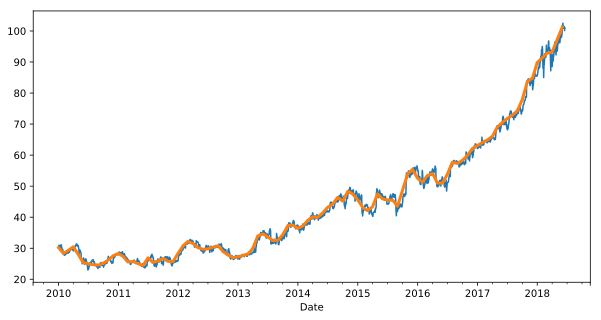

In [32]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
msft.Close.plot(figsize=(10,5))
msft.Close.resample("M").mean().plot(linewidth=3)
plt.show()

### OHLC: Open, High, Low, Close

A very interesting function is `ohlc`, that computes several values for a date range.

In [33]:
msft.Close.resample("A").ohlc()

,open,high,low,close
Date,,,,
2010-12-31,30.4800,31.39,23.010,27.9100
2011-12-31,27.9800,28.87,23.705,25.9600
2012-12-31,25.9600,32.85,25.960,26.7097
2013-12-31,26.7097,38.94,26.460,37.4100
2014-12-31,37.4100,49.61,34.980,46.4500
2015-12-31,46.4500,56.55,40.290,55.4800
2016-12-31,55.4800,63.62,48.430,62.1400
2017-12-31,62.1400,86.85,62.140,85.5400
2018-12-31,85.5400,102.49,85.010,100.8600


### Custom ranges

Every two years:

In [34]:
msft.Close.resample("2A").pad().head()

Date
2010-12-31     27.9100
2012-12-31     26.7097
2014-12-31     46.4500
2016-12-31     62.1400
2018-12-31    100.8600
Name: Close, dtype: float64

### Upsampling

Apart of grouping data (or _downsampling_) we can also calculate interpolated values. For instence, we're going to calculate values for each quarter, using `"Q"` or `"4M"` parameters.

First we need to get the data downsampled to year values, using latest one.

In [35]:
msft_year = msft.Close.resample("A").pad()
msft_year

Date
2010-12-31     27.9100
2011-12-31     25.9600
2012-12-31     26.7097
2013-12-31     37.4100
2014-12-31     46.4500
2015-12-31     55.4800
2016-12-31     62.1400
2017-12-31     85.5400
2018-12-31    100.8600
Freq: A-DEC, Name: Close, dtype: float64

Then we can interpolate some values. Normally you would use `ffill`, optionally setting the maximum number of rows to fill before stopping propagation and filling with `NaN`.

In [36]:
rs = msft_year.resample("Q")
max_propagated = 2
pd.DataFrame({ 'mean': rs.mean(), 'ffill': rs.ffill(), 'ffill_max': rs.ffill(max_propagated) })[:9]

,mean,ffill,ffill_max
Date,,,
2010-12-31,27.9100,27.9100,27.9100
2011-03-31,NaN,27.9100,27.9100
2011-06-30,NaN,27.9100,27.9100
2011-09-30,NaN,27.9100,NaN
2011-12-31,25.9600,25.9600,25.9600
2012-03-31,NaN,25.9600,25.9600
2012-06-30,NaN,25.9600,25.9600
2012-09-30,NaN,25.9600,NaN
2012-12-31,26.7097,26.7097,26.7097


---

## Cookbook


### Reading data file as a Series

In [37]:
series = pd.read_csv("goog.csv", header=0, index_col=0, squeeze=True, usecols=[0, 4], parse_dates=True)
series.head(2)

Date
2016-07-01    699.210022
2016-06-30    692.099976
Name: Close, dtype: float64

In [38]:
series.mean()

545.5555842261632

### Combining Series into new DataFrame

In [39]:
msft_aapl = pd.DataFrame({ 'msft': msft.Close, 'aapl': aapl.Close })
msft_aapl[:3]

,msft,aapl
Date,,
2010-01-01,30.48,30.1046
2010-01-04,30.95,30.5729
2010-01-05,30.96,30.6257


By default it uses closed ranges.

### Column projections

In [40]:
aapl["Year"] = aapl.index.map(lambda d: d.year)
aapl[:2]

/Users/luis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Close,High,Low,Open,Volume,Year
Date,,,,,,
2010-01-01,30.1046,30.4786,30.08,30.4443,0,2010
2010-01-04,30.5729,30.6429,30.34,30.5000,123432050,2010


### Using custom indexes

In [41]:
dates = pd.date_range('2015-10', '2016-02', freq='M')
dates

DatetimeIndex(['2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31'], dtype='datetime64[ns]', freq='M')

In [42]:
from pandas import Series
Series(series, index=dates)

2015-10-31           NaN
2015-11-30    742.599976
2015-12-31    758.880005
2016-01-31           NaN
Freq: M, Name: Close, dtype: float64

### Install packages in Azure Notebooks

Very simple, use `pip` or `conda`:

`!pip install package_name`.